## **<span style="color: orange;">5. Representation Techniques: Bag of Words </span>**

In this chapter, we will continue the analysis of standard machine learning models, including XGBoost, Random Forest, SVM, Logistic Regression, and Naive Bayes, using various NLP representation techniques such as Bag of Words, TF-IDF, and Word Embeddings. The chapter is organized into three separate notebook files, each dedicated to one of the representation techniques. We will preprocess the dataframes in advance using a function defined in a Python file. These models were selected based on our experience with them in the previous semester's course, Predictive Analytics, and our familiarity with their performance indicators. We believe it will be interesting to apply them to text classification as well.

In [1]:
from functions import install_and_import_packages, preprocess_text, plot_overall_findings, install_and_import_packages

# Call the function to install and import packages
install_and_import_packages()

# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')
import time

# Start time
start_time = time.time()

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# After reading the xsl file we find 4 missing values in the column 'Content'
df = pd.read_excel('cleansed_data.xlsx')
df.head()
df.isna().sum()
  

SenderID             0
ReceiverID           0
ActionType           0
NegoOutcome          0
Content              0
length               0
WordCount_basic      0
Content_Length       0
Sentence_Count       0
Word_Count_nltk      0
NegoOutcomeLabel     0
Sentiment            0
SentimentCategory    0
dtype: int64

In [3]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel,Sentiment,SentimentCategory
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,1635,219,1635,1,219,1,0.226814,Positive
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,1462,197,1462,1,197,1,0.156856,Positive
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,1465,195,1465,1,195,1,0.219167,Positive
3,69,70,Counteroffer,FinalAccept,swift reply read second set proposal discussed...,1104,148,1104,1,148,1,0.139561,Positive
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1153,154,1153,1,154,1,0.055179,Positive


### **<span style="color: orange;">Bag of Words (BoW)</span>**

A traditional and widely used approach for topic-based TC is the Bag of Words (BOW) model. This model transforms text into a vector that represents the frequency of each word (or chosen word set) within the text, disregarding word order and grammar. The Bag of Words (BOW) model remains a cornerstone for topic-based classification tasks due to its simplicity and effectiveness. When implemented with a large corpus of unigram words, the BOW representation allows machine learning algorithms to capture important topic-related features from text data. We hypothesize that by applying specific combinations of preprocessing techniques, the accuracy of BOW-based classification models can be significantly improved (HaCohen et al., 2020).

In our project, we test the BOW model with unigram word sets ranging from 1,000 to 5,000 words, in steps of 1,000, to evaluate how preprocessing methods affect the classification outcomes. We expect that the optimal preprocessing combination will enhance the signal-to-noise ratio, allowing machine learning algorithms to better identify the core topics within the text.

- Reference: HaCohen-Kerner Y, Miller D, Yigal Y (2020) The influence of preprocessing on text classification using a bag-of-words representation. PLOS ONE 15(5): e0232525. https://doi.org/10.1371/journal.pone.0232525

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
import pandas as pd

# Count rows with missing values
na_rows = df[df['Content'].isna()]
print(na_rows)

Empty DataFrame
Columns: [SenderID, ReceiverID, ActionType, NegoOutcome, Content, length, WordCount_basic, Content_Length, Sentence_Count, Word_Count_nltk, NegoOutcomeLabel, Sentiment, SentimentCategory]
Index: []


In [6]:
import pandas as pd

# Remove rows with NaN in Content
df = df.dropna(subset=['Content'])

# Remove rows with empty strings or insignificant content in Content
def is_insignificant_content(content):
    return content.strip() == '' or content.strip() == '.' or len(content.split()) == 1

df = df[~df['Content'].apply(is_insignificant_content)]

# Validate Content Length (optional, if Content_Length column is used)
df['Content_Length'] = df['Content'].apply(len)

# Preprocess the data before using bag of word

In [7]:
# using function preprocess_text from functions.py it removes stopwords and lemmatized and tokenizes the text
#from functions import preprocess_text

#df = preprocess_text(df, 'Content')

In [8]:
# Fit and transform the Content column using CountVectorizer
count_vectorizer = CountVectorizer()
message_vector = count_vectorizer.fit_transform(df['Content'])
message_vector

<2316x6685 sparse matrix of type '<class 'numpy.int64'>'
	with 178430 stored elements in Compressed Sparse Row format>

In [9]:
# Convert the sparse matrix to a DataFrame
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data = message_array, columns=count_vectorizer.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [10]:
df_countvectorizer.columns

Index(['abandon', 'abandoned', 'abandoning', 'abdicate', 'aber', 'abiding',
       'ability', 'able', 'abort', 'aboutthe',
       ...
       'zeroemission', 'zurich', 'zürich', 'áafter', 'ánd', 'íteams', 'óf',
       'ülan', 'šimi', 'šmic'],
      dtype='object', length=6685)

While BoW is easy to implement and understand, it has some limitations, such as ignoring word order and context techniques. It involves the following steps:
1. Tokenizing the text into individual words.
2. Creating a vocabulary of all unique words in the corpus.
3. Representing each document as a vector of word counts, where each element of the vector corresponds to the count of a specific word in the document.

In this code, we are configuring the parameters for a bag-of-words model using the CountVectorizer from the sklearn.feature_extraction.text module. The ngram_range is set to (2, 3) to include unigrams, bigrams and trigrams, as these were found to be common in the data. The stop_words parameter is set to 'u' to remove the term "u", which was frequently appearing in the word cloud after cleansing, even though other stopwords have already been removed. The max_features parameter limits the model to consider only the top 5000 terms by frequency. The analyzer is set to 'word' to ensure that the features are made of words, and the binary parameter is set to False to use term frequency instead of binary occurrence. Finally, the token_pattern is defined by a regular expression to specify what constitutes a valid token.

In [11]:
# Setting parameters to bag of words 
count_vectorizer_ngrams = CountVectorizer(
    ngram_range=(1, 2), #try out unigrams -bigram combination but also bigram-trigram           
    stop_words=['u'],            
    max_features=4000,           
    analyzer='word',             
    binary=False,               
    token_pattern=r'\b\w+\b'     
)

In [12]:
# Fit and transform the text data
message_vector_ngrams = count_vectorizer_ngrams.fit_transform(df['Content'])
df_countvectorizer_ngrams = pd.DataFrame(
    data=message_vector_ngrams.toarray(), 
    columns=count_vectorizer_ngrams.get_feature_names_out()
)

In [13]:
message_vector_ngrams.shape

(2316, 4000)

# **<span style="color: orange;">XGBoost Model</span>**

After setting the bag of words we will run a xgboost model to predict the outcome. Here we will also run overfitting tests and hyperparameter optimiazation to receive the best possible accuracy. 

In [14]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

In [15]:
# Define features and target
X_xgb = df_countvectorizer_ngrams.values  # Features from CountVectorizer
y_xgb = df['NegoOutcomeLabel'].values  # Target

In [16]:
# Split data into training and testing sets using stratitfy because of pssible class imbalance
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.33, random_state=42, stratify=y_xgb)

In [17]:
# Initial XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
# Predict and evaluate the model
y_pred_test = xgb_model.predict(X_test_xgb)


In [19]:
# Print AUC score
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test_xgb, y_pred_test)))

ROC AUC: 0.6459


The ROC AUC score for XGBoost, which is 0.6221, tells us about the model's ability to distinguish between the positive and negative classes. A score of 0.6769 indicates that the model has a moderate ability to discriminate between the classes, with 1.0 being a perfect classifier and 0.5 representing a model with no discriminative power (equivalent to random guessing).

In [20]:
# Classification report
print(classification_report(y_test_xgb, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48       239
           1       0.76      0.91      0.83       526

    accuracy                           0.74       765
   macro avg       0.71      0.65      0.66       765
weighted avg       0.73      0.74      0.72       765



The classification report supports this observation, as it shows that the score for class 1 is significantly higher than for class 0. Overall, the accuracy is 73%, which appears to be a good score. However, we need to check if the model overfits the data. If overfitting is detected, we should apply tuning methods to improve the model's performance and generalization.

In [21]:
# Print Train and Test accuracy of intital model
print("Train accuracy: {:.4f}".format(xgb_model.score(X_train_xgb, y_train_xgb)))
print("Test accuracy: {:.4f}".format(xgb_model.score(X_test_xgb, y_test_xgb)))

Train accuracy: 0.9903
Test accuracy: 0.7438


Its evident that there is a overfitting since the train set accuracy exceeds the accuracy by 20% compared to the test accuracy.

In [22]:
# Hyperparameter tuning with GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]

}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_xgb, y_train_xgb)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [23]:
# Use the best parameters
best_params = grid_search.best_params_
best_xgb_model = xgb.XGBClassifier(**best_params, random_state=42,use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [24]:
# Predict and evaluate the optimized model
y_pred_best = best_xgb_model.predict(X_test_xgb)

In [25]:
# Print accurcacy score
print("Accuracy: {:.4f}".format(accuracy_score(y_test_xgb, y_pred_best)))

Accuracy: 0.7516


In [26]:
# Print the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}


In [27]:
# Evaluate the Model
print("XGBoostEvaluation:")
print(f"Training Accuracy: {best_xgb_model.score(X_train_xgb, y_train_xgb):.4f}")
print(f"Test Accuracy: {best_xgb_model.score(X_test_xgb, y_test_xgb):.4f}")

XGBoostEvaluation:
Training Accuracy: 0.9684
Test Accuracy: 0.7516


In [28]:
# Generate and directly print the classification report
print(classification_report(y_test_xgb, y_pred_best))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49       239
           1       0.77      0.92      0.84       526

    accuracy                           0.75       765
   macro avg       0.72      0.65      0.66       765
weighted avg       0.74      0.75      0.73       765



Overfitting still persists in the data but smaller than before so there was a slightly optimization in this part but we may include using SMOTE balancing techniques to handle the class imbalance of the minory class "0" since the F1 score now is worse than before.

In [29]:
pip install SMOTE


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Define the oversampling method
sm = SMOTE(random_state=42)

# Fit and transform the data
X_train_sm, y_train_sm = sm.fit_resample(X_train_xgb, y_train_xgb)

# Fit the model
best_xgb_model.fit(X_train_sm, y_train_sm)

# Predict and evaluate the model
y_pred_sm = best_xgb_model.predict(X_test_xgb)

# Print the classification report
print(classification_report(y_test_xgb, y_pred_sm))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       239
           1       0.78      0.79      0.78       526

    accuracy                           0.70       765
   macro avg       0.65      0.64      0.64       765
weighted avg       0.69      0.70      0.70       765



Even when using class imbalance tequnices like smote the results dont seem to change a lot it just increases the F1-Score a little bit but also decreases overall accuracy since now the class 1 is being predicted worse. Maybe these basic ML models are not appropiate enough for this classification of NLP data.

In [31]:
# Save results to a DataFrame for later comparison
results_xgb = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost (Optimized)'],
    'Accuracy': [accuracy_score(y_test_xgb, y_pred_test), accuracy_score(y_test_xgb, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_xgb, y_pred_test), roc_auc_score(y_test_xgb, y_pred_best)],
    'F1 Score': [f1_score(y_test_xgb, y_pred_test, average='weighted'), f1_score(y_test_xgb, y_pred_best, average='weighted')]
})

# **<span style="color: orange;">Naive Bayes</span>**

For the following model we will be using the Gaussian Naive Bayes classifier.

In [32]:
# Define features and target
X_nb = df_countvectorizer_ngrams.values  # Features from CountVectorizer
y_nb = df['NegoOutcomeLabel'].values  # Target

In [33]:
# Split data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.33, random_state=42, stratify=y_nb)

In [34]:
from sklearn.naive_bayes import GaussianNB
# Initial GaussianNB model
gnb = GaussianNB()
gnb.fit(X_train_nb, y_train_nb)

GaussianNB()

In [35]:
y_pred_test = gnb.predict(X_test_nb)

In [36]:
# Evaluate the Model
print("Naive Bayes Model Evaluation:")
print(f"Training Accuracy: {gnb.score(X_train_nb, y_train_nb):.4f}")
print(f"Test Accuracy: {gnb.score(X_test_nb, y_test_nb):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_test))

Naive Bayes Model Evaluation:
Training Accuracy: 0.7034
Test Accuracy: 0.5359
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.61      0.45       239
           1       0.74      0.50      0.60       526

    accuracy                           0.54       765
   macro avg       0.55      0.56      0.52       765
weighted avg       0.62      0.54      0.55       765



overfitting persistent but else the values seem to be okay

In [37]:
# Cross-Validation
cv_scores = cross_val_score(gnb, X_train_nb, y_train_nb, cv=20, scoring='accuracy') # try it also out with 30,50,100 -> results are all around 65% meaning there is no big chance in the score
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.57692308 0.53846154 0.52564103 0.62820513 0.52564103 0.57692308
 0.61538462 0.52564103 0.57692308 0.53846154 0.52564103 0.53246753
 0.51948052 0.54545455 0.44155844 0.53246753 0.44155844 0.51948052
 0.61038961 0.58441558]
Mean CV Accuracy: 0.5441


In this case, the mean cross-validation accuracy is 0.6427, indicating that, on average, the model correctly predicts the outcome approximately 64.27% of the time. This indicates that the model is quite stabel across multiple folds and consistent but there is still room for improvement maybe after tuning it will increase.

In [38]:
# Hyperparameter Tuning
params = {'var_smoothing': np.logspace(0, -9, num=100)}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train_nb, y_train_nb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [39]:
# Best Parameters and Score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Retrain with Best Parameters
gnb_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
gnb_best.fit(X_train_nb, y_train_nb)
y_pred_best = gnb_best.predict(X_test_nb)

Best Hyperparameters: {'var_smoothing': 0.0003511191734215131}
Best CV Score: 0.7298428453267164


In [40]:
# Evaluate the Model
print("Naive Bayes Model Evaluation:")
print(f"Training Accuracy: {gnb.score(X_train_nb, y_train_nb):.4f}")
print(f"Test Accuracy: {gnb.score(X_test_nb, y_test_nb):.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test_nb, y_pred_best))

Naive Bayes Model Evaluation:
Training Accuracy: 0.7034
Test Accuracy: 0.5359
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.41      0.47       239
           1       0.76      0.86      0.81       526

    accuracy                           0.72       765
   macro avg       0.66      0.63      0.64       765
weighted avg       0.70      0.72      0.70       765



The results here also seem to be overfitted and incosistent especially for the 0 class it performs very poorly and the overall accuracy score also is quite low.

In [41]:
# Save results to a DataFrame for later comparison
results_nb = pd.DataFrame({
    'Model': ['Naive Bayes', 'Naive Bayes (Optimized)'],
    'Accuracy': [accuracy_score(y_test_nb, y_pred_test), accuracy_score(y_test_nb, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_nb, y_pred_test), roc_auc_score(y_test_nb, y_pred_best)],
    'F1 Score': [f1_score(y_test_nb, y_pred_test, average='weighted'), f1_score(y_test_nb, y_pred_best, average='weighted')]
})

# **<span style="color: orange;">Random Forest</span>**

Another model we would like to try out that is also reliable in other tasks and similar to XGboost is the Random Forest classifier. Here we will follow again a similar approach by first running the initial model and than tuning it to improve if possible the model.

In [42]:
# Define features and target
X_rf = df_countvectorizer_ngrams.values  # Features from CountVectorizer
y_rf = df['NegoOutcomeLabel'].values  # Target

In [43]:
# Split data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42, stratify=y_rf)

In [44]:
X_train_rf.shape, X_test_rf.shape

((1621, 4000), (695, 4000))

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict on test data
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_rf, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_rf, y_pred_rf))
# print test and train accuracy
print("Train accuracy: {:.4f}".format(rf.score(X_train_rf, y_train_rf)))
print("Test accuracy: {:.4f}".format(rf.score(X_test_rf, y_test_rf)))

Random Forest Classifier
Accuracy: 0.7294964028776978
Confusion Matrix:
 [[ 47 170]
 [ 18 460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.22      0.33       217
           1       0.73      0.96      0.83       478

    accuracy                           0.73       695
   macro avg       0.73      0.59      0.58       695
weighted avg       0.73      0.73      0.68       695

Train accuracy: 0.9994
Test accuracy: 0.7295


Here there is a huge overfitting since the train accurccy equls a very high percentage nearly perfect and test only  approximately 72-75%. WWhat we noted is that its caused because of the dataset. The observations seem to be too few and also the cleansing part might exluded too much but even after using other saved dataframes the scores did not seem to perform better.

In [47]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(criterion='gini', random_state=42, n_estimators=100, n_jobs=-1, verbose=1)
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params, scoring='accuracy', cv=10, verbose=1)
grid_search.fit(X_train_rf, y_train_rf)

# warnings can be ignored

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [48]:
rf_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=15, min_samples_split=10, random_state=42)

In [49]:
rfc_best_pred = rf_best.predict(X_test_rf)

In [50]:
# print train and test accuracy
print("Train accuracy: {:.4f}".format(rf_best.score(X_train_rf, y_train_rf)))
print("Test accuracy: {:.4f}".format(rf_best.score(X_test_rf, y_test_rf)))

Train accuracy: 0.7909
Test accuracy: 0.7079


In [51]:
# print classification report
print(classification_report(y_test_rf, rfc_best_pred))

              precision    recall  f1-score   support

           0       0.82      0.08      0.15       217
           1       0.70      0.99      0.82       478

    accuracy                           0.71       695
   macro avg       0.76      0.54      0.49       695
weighted avg       0.74      0.71      0.61       695



The class imbalance is still present in the dataset, stronger than before but therefore overfitting was "Prevented". We will use the SMOTE technique to balance the classes but until now it appears that optimization and tuning methods only improve overfitting but cannot handle class imbalance.

In [52]:
# balance the classes 0 and 1 with smote to possibly improve the model
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_rf, y_train_rf)

# fit the model
rf_best.fit(X_train_sm, y_train_sm)

# predict and evaluate the model
y_pred_sm = rf_best.predict(X_test_rf)

# print classification report
print(classification_report(y_test_rf, y_pred_sm))


              precision    recall  f1-score   support

           0       0.40      0.36      0.38       217
           1       0.72      0.75      0.74       478

    accuracy                           0.63       695
   macro avg       0.56      0.56      0.56       695
weighted avg       0.62      0.63      0.62       695



Smote handles the class imbalance for the minor class a little but still not enough to rely on the predictions.

In [53]:
# Save results to a DataFrame for later comparison
results_rf = pd.DataFrame({
    'Model': ['Random Forest', 'Ramdom Forest (Optimized)'],
    'Accuracy': [accuracy_score(y_test_rf, y_pred_rf),accuracy_score(y_test_rf, rfc_best_pred)],
    'ROC AUC': [roc_auc_score(y_test_rf, y_pred_rf), roc_auc_score(y_test_rf, rfc_best_pred)],
    #Also include weighted F1 score
    'F1 Score': [f1_score(y_test_rf, y_pred_rf, average='weighted'), f1_score(y_test_rf, rfc_best_pred, average='weighted')]
    })


# **<span style="color: orange;">Logistic Regression</span>**

In [54]:
import numpy as np
import nltk
from nltk.data import find
import gensim
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [55]:
# Define features and target
X_log = df_countvectorizer_ngrams.values  # Features from CountVectorizer
y_log = df['NegoOutcomeLabel'].values  # Target

In [56]:
# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.33, random_state=42, stratify=y_log)

In [57]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_log, y_train_log)


LogisticRegression()

In [58]:
# Predict on test set
y_pred_test = logreg.predict(X_test_log)

In [59]:
# Check if there's overfitting or underfitting by comparing the training and test accuracy scores
print(f"Training-set accuracy score: {logreg.score(X_train_log, y_train_log):.4f}")
print(f"Test-set accuracy score: {logreg.score(X_test_log, y_test_log):.4f}")

Training-set accuracy score: 0.9942
Test-set accuracy score: 0.7216


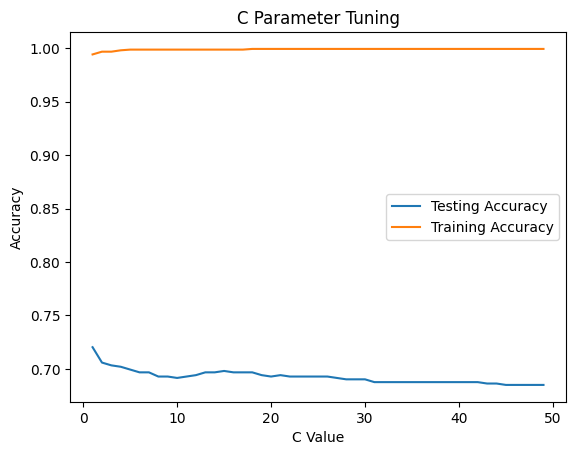

In [60]:
# Tuning the C parameter
section = np.arange(1, 50)
test_accuracy = np.empty(len(section))
train_accuracy = np.empty(len(section))
for i, k in enumerate(section): 
    logreg_tune = LogisticRegression(C=k, solver='liblinear', random_state=42)
    logreg_tune.fit(X_train_log, y_train_log)
    test_accuracy[i] = logreg_tune.score(X_test_log, y_test_log)
    train_accuracy[i] = logreg_tune.score(X_train_log, y_train_log)

# Plot the tuning results
plt.title('C Parameter Tuning')
plt.plot(section, test_accuracy, label='Testing Accuracy')
plt.plot(section, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.show()

The paramter tuning shows that the traning and test accuracy are not close to each other thats another evidence for overfitting of of the model.

In [61]:
# Logistic Regression with tuned C=5 (chosen from grid search)
logreg_best = LogisticRegression(C=5, solver='liblinear', random_state=42)
logreg_best.fit(X_train_log, y_train_log)


LogisticRegression(C=5, random_state=42, solver='liblinear')

In [62]:
# Predict with the best model
y_pred_best = logreg_best.predict(X_test_log)

In [63]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test_log, y_pred_best)
print(f"ROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.6353


ROC score confirms class imbalance still close to random guessing but slightly better.

In [64]:
# Hyperparameter tuning using GridSearchCV
parameters = [{'penalty': ['l1', 'l2']}, {'C': [1, 5, 10, 100, 250, 1000]}]
grid_search = GridSearchCV(estimator=logreg_best, param_grid=parameters, cv=10, scoring='accuracy')
grid_search.fit(X_train_log, y_train_log)

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=5, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [1, 5, 10, 100, 250, 1000]}],
             scoring='accuracy')

In [65]:
# Print out the best score and best parameters
print(f"Best GridSearchCV Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")


Best GridSearchCV Score: 0.7285
Best Parameters: {'C': 1}


The Gridsearch for the logistic regression suggest us to use a C=1 and selects our best parameters,lets see if this will improve our model results.

In [66]:
# Best Model from GridSearchCV
best_logreg = grid_search.best_estimator_

In [67]:

# Predict with the best model
y_pred_best = best_logreg.predict(X_test_log)

In [68]:
# print test and training accuracy
print("Train accuracy: {:.4f}".format(best_logreg.score(X_train_log, y_train_log)))
print("Test accuracy: {:.4f}".format(best_logreg.score(X_test_log, y_test_log)))

Train accuracy: 0.9942
Test accuracy: 0.7203


In [69]:
# plot cassification report to evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test_log, y_pred_best))

              precision    recall  f1-score   support

           0       0.56      0.46      0.51       239
           1       0.77      0.84      0.80       526

    accuracy                           0.72       765
   macro avg       0.67      0.65      0.66       765
weighted avg       0.71      0.72      0.71       765



### Use Sample Techniques to improve class imbalance

In [70]:
# use another smapling method to handle minorty class
# use also randomoversampler and undersampler
sm = SMOTE(random_state=42) 
X_train_sm, y_train_sm = sm.fit_resample(X_train_log, y_train_log)

# fit the model
best_logreg.fit(X_train_sm, y_train_sm)

# predict and evaluate the model
y_pred_sm = best_logreg.predict(X_test_log)

# print classification report
print(classification_report(y_test_log, y_pred_sm))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       239
           1       0.78      0.75      0.76       526

    accuracy                           0.68       765
   macro avg       0.63      0.64      0.63       765
weighted avg       0.69      0.68      0.68       765



Class imbalance cannot be improve by smote techniques, we also tried out RandomUndersampler and Oversampler but still the imbalance could not be improved significantly.

In [71]:
# Save results to a DataFrame for later comparison
results_logreg = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Optimized)'],
    'Accuracy': [accuracy_score(y_test_log, y_pred_test), accuracy_score(y_test_log, y_pred_best)],
    'ROC AUC': [roc_auc_score(y_test_log, y_pred_test), roc_auc_score(y_test_log, y_pred_best)],
    'F1 Score': [f1_score(y_test_log, y_pred_test, average='weighted'), f1_score(y_test_log, y_pred_best, average='weighted')]
})


# **<span style="color: orange;">Support Vector Machine</span>**

In [72]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import pandas as pd

In [73]:
# Define features and target
X_svm = df_countvectorizer_ngrams.values  # Features from CountVectorizer
y_svm = df['NegoOutcomeLabel'].values  # Target

In [74]:
# Split data into training and testing sets
X_train_svm , X_test_svm , y_train_svm , y_test_svm  = train_test_split(X_svm , y_svm , test_size=0.2, random_state=42, stratify=y_svm )

In [75]:
# Fit base SVM model
svm = SVC()
svm.fit(X_train_svm , y_train_svm)

SVC()

In [76]:
# Predict with base SVM model
y_pred_svm = svm.predict(X_test_svm)

In [77]:
svm.support_vectors_

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
# Check if model overfits for inital model
print("Train set Accuracy: ", svm.score(X_train_svm, y_train_svm))
print("Test set Accuracy: ", svm.score(X_test_svm, y_test_svm))

Train set Accuracy:  0.857451403887689
Test set Accuracy:  0.7155172413793104


Model seems to perform quite quell compared to the previous ones but still overfitting is a big issue.

In [79]:
# How good is the ROC based prediction?
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test_svm, y_pred_svm)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5448


Low ROC AUC score implies that the model is quite instable. We will run a gridsearch for the SVM model to find out the best parameters.

In [80]:
# What are the best parameters for the model?
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'gamma': [0.1, 0.9], 'kernel': ['rbf', 'linear']})

grid_search.fit(X_train_svm, y_train_svm)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.9],
                         'kernel': ['rbf', 'linear']})

In [81]:
# print out best possible parameters
print('Best parameters:', grid_search.best_params_)

# print out best score
print('Gridsearch CV best score:', grid_search.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Gridsearch CV best score: 0.7121993152181831


In [82]:
#Modeling with the optimal parameters
best_svm = SVC(kernel='rbf', gamma=0.9, C=10)

#it classifier to training data
best_svm.fit(X_train_svm, y_train_svm)

#make new predictions
y1_pred = best_svm.predict(X_test_svm)

In [83]:
# Print results to test for overfitting again and compare the before and after
print('train accuracy before:', svm.score(X_train_svm, y_train_svm))
print('test accuracy before:', svm.score(X_test_svm, y_test_svm))

print('train accuracy after:', best_svm.score(X_train_svm, y_train_svm))
print('test accuracy after:', best_svm.score(X_test_svm, y_test_svm))

train accuracy before: 0.857451403887689
test accuracy before: 0.7155172413793104
train accuracy after: 0.9994600431965442
test accuracy after: 0.6875


Now its way more overfitted than before so if every model performs similar that problem lies within the data or the limitations of the selected classical ML models. RNN could be a better approach to handle the data, we stay optimistic.

In [84]:
# ROC of optimized model in comparison to previous model
ROC_AUC = roc_auc_score(y_test_svm, y_pred_svm)

print('ROC AUC before: {:.4f}'.format(ROC_AUC))

ROC_AUC1 = roc_auc_score(y_test_svm, y1_pred)

print('ROC AUC after: {:.4f}'.format(ROC_AUC1))

ROC AUC before: 0.5448
ROC AUC after: 0.5000


Now the ROC Score is nearly a 50/50 guess. The predictions are not stable and not reliable at all.

In [85]:
from sklearn.model_selection import cross_val_score

C_range = list(range(1, 10))
acc_score = []

# Cross validation with 10 folds
for c in C_range:
    svc = SVC(kernel= 'poly',C=c)
    scores = cross_val_score(svc, X_svm, y_svm, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())   
print(acc_score)

[0.6662468278847589, 0.6567416778623676, 0.6541554709658157, 0.6519928347514555, 0.6524369308852067, 0.6515748619196895, 0.6498507239886551, 0.6481265860576204, 0.6446727123451261]


Text(0, 0.5, 'Cross-Validated Accuracy')

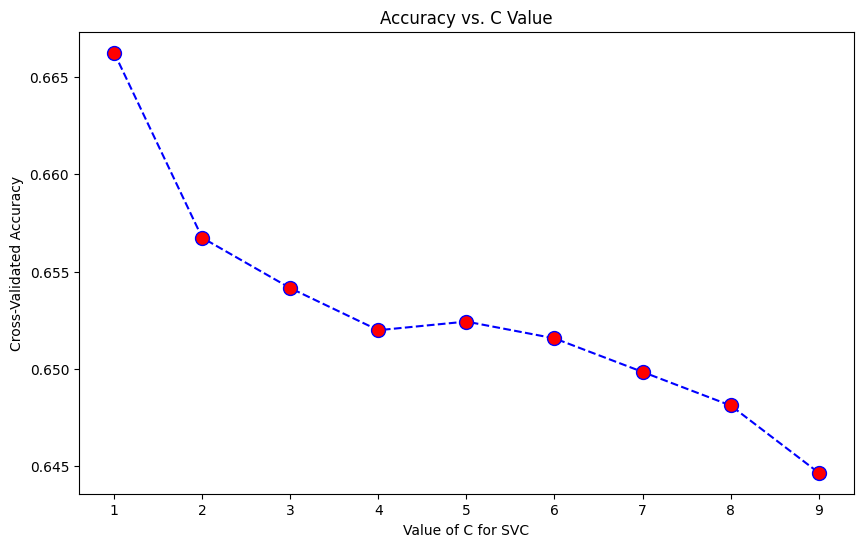

In [86]:
# visualize optimisation iteration
plt.figure(figsize=(10,6))
plt.plot(C_range,acc_score,color = 'blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. C Value')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

There is clearly a decrease in the accuracy score if the C parameter increases, but not a big difference from the initial value of 0.67 since the lowest reached is at 0.645. 

In [87]:
# Compute the cross-val scores for the model with default setting and our optimzed model

#Cross validation for model with default setting
scores = cross_val_score(svm, X= X_train_svm, y = y_train_svm, cv=10, n_jobs=1)
print("Cross-validation scores for default model: {}".format(scores))

#Cross validation for model with optimized setting
scores1 = cross_val_score(best_svm, X= X_train_svm, y = y_train_svm, cv=10, n_jobs=1)
print("Cross-validation scores for optimized model: {}".format(scores1))

Cross-validation scores for default model: [0.7311828  0.7311828  0.72972973 0.71351351 0.71891892 0.72432432
 0.7027027  0.71891892 0.7027027  0.72972973]
Cross-validation scores for optimized model: [0.69354839 0.6827957  0.69189189 0.69189189 0.68648649 0.68648649
 0.68648649 0.68648649 0.68648649 0.69189189]


The cross validation score is stable along more folds that indicates that the model itself is consistent so the unpredictable class imbalance is the cause of to few data.

In [88]:
# plot classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test_svm, y1_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.69      1.00      0.81       319

    accuracy                           0.69       464
   macro avg       0.34      0.50      0.41       464
weighted avg       0.47      0.69      0.56       464



Low ROC score makes sense since in the report we note that class 0 is now predicted not at all.

In [89]:
# Save results to a DataFrame for later comparison
results_svm = pd.DataFrame({
    'Model': ['SVM', 'SVM (Optimized)'],
    'Accuracy': [accuracy_score(y_test_svm, y_pred_svm), accuracy_score(y_test_svm, y1_pred)],
    'ROC AUC': [roc_auc_score(y_test_svm, y_pred_svm), roc_auc_score(y_test_svm, y1_pred)],
    'F1 Score': [f1_score(y_test_svm, y_pred_svm, average='weighted'), f1_score(y_test_svm, y1_pred, average='weighted')]
})


# **<span style="color: orange;">Model Comparison</span>**

In [90]:
# Concatenate all model results into a single DataFrame and save it to xslc file
results_combined_bow = pd.concat([results_xgb, results_nb, results_rf, results_svm, results_logreg], ignore_index=True)
results_combined_bow.to_excel('results_combined_bow.xlsx', index=False)


In [91]:
results_combined_bow

,Model,Accuracy,ROC AUC,F1 Score
0,XGBoost,0.743791,0.645891,0.721670
1,XGBoost (Optimized),0.751634,0.651594,0.728274
2,Naive Bayes,0.535948,0.555248,0.552239
3,Naive Bayes (Optimized),0.716340,0.632778,0.702271
4,Random Forest,0.729496,0.589466,0.675149
5,Ramdom Forest (Optimized),0.707914,0.537291,0.613499
6,SVM,0.715517,0.544828,0.621067
7,SVM (Optimized),0.687500,0.500000,0.560185
8,Logistic Regression,0.721569,0.650278,0.712811
9,Logistic Regression (Optimized),0.720261,0.650469,0.712158


In [92]:
import sys

# List all loaded modules
print(sys.modules.keys())

# delete functions module after making changes in the functions.py file to include them, can lead to errors
del sys.modules['functions']

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'winreg', '_io', 'marshal', 'nt', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', '_winapi', 'ntpath', 'os.path', 'os', '_sitebuiltins', 'encodings.cp1252', '_distutils_hack', 'pywin32_system32', 'pywin32_bootstrap', 'site', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib._abc', 'types', 'importlib.util', 'runpy', 'posixpath', '_operator', 'operator', 'itertools', 'keyword', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'enum', '_sre', 're._constants', 're._parser', 're._casefix', 're._compiler', 'copyreg', 're', 'fnmatch', 'errno', 'urllib', 'math', 'ipaddress', 'urllib.parse', 'pathlib', 'collections.abc', 'contextlib', '_typing', 

[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


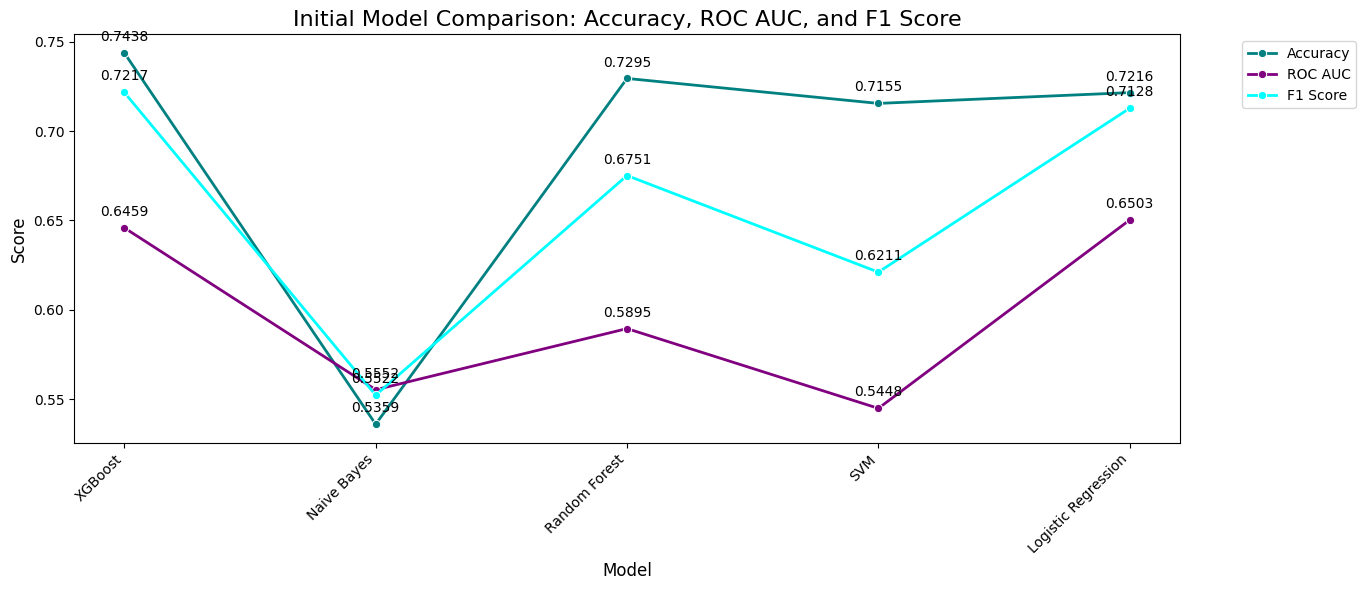

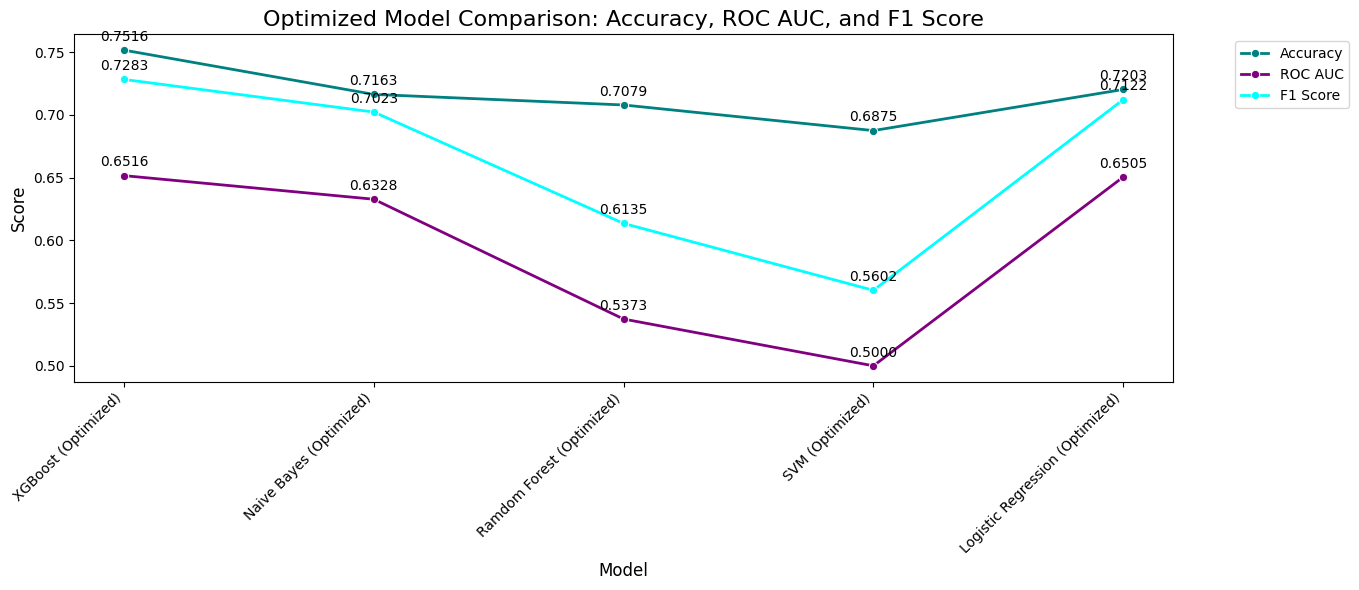

In [93]:
# Import function from functions.py file
from functions import plot_model_comparison

# Plot the model comparison and add note that its the Bag of Words model
plot_model_comparison(results_combined_bow)

We note that the best-performing models in terms of accuracy are the XGBoost, Random Forest and Logistic Regression models. However, when examining the F1-Score, we observe that the results are not very high. This is due to the class imbalance between the majority class (class 1) and the minority class (class 0) in the dataset. Overall, the models are overfitting, which is attributed to the small dataset size. Despite using sampling techniques, we could not significantly improve the class imbalance, and overfitting still persisted. However, we are curious to see how the results will change when running RNN models and transformer models for classification, as they may handle the imbalance and overfitting better with their training methods.

In [94]:
# End time
end_time = time.time()
total_time = end_time - start_time

print(f"Total runtime of the notebook: {total_time:.2f} seconds")

Total runtime of the notebook: 1107.85 seconds
